In [2]:
function rot(A,B,C)
    #z=(y2 - y1)*(x3 - x2) - (y3 - y2)*(x2 - x1)
    #if z<0 CCW
    #if z=0 COL
    #if z>0 CW
    return((B[2]-A[2])*(C[1]-B[1])-(B[1]-A[1])*(C[2]-B[2]))
end

function dist(a,b) #This function compute the euclidian distance between two points
    c=a.-b; c=c.^2; dit=sqrt(sum(c));
    return dit
end

function ToTuple(a) #Convert an Array{Array{Float64,Float64}} onto Array{Tuple{Float64,Float64}}
    c=[ ];
    p=length(a);
    for i in 1:p
        push!(c,(a[i][1],a[i][2]))
    end
    c=convert(Array{Tuple{Float64,Float64},1},c);
    return c
end

function J_Con_Hull(a)
    PCH=[];d=0; cP=[]; dt=0;
    
    ap=sort(a, lt=(x,y)->isless(x[1], y[1]));
    push!(PCH,ap[1]);
    
    start=PCH[1];
    current=start;
    
    while true
        
        NT=a[1];
        for i in 1:length(a)
            if a[i]==current
                continue
            end
            
            d=rot(current,NT,a[i]);
            dt=0;
            
            if d<0
                NT=a[i];
                cP=[];
            elseif d==0
                dt=dist(current,NT)-dist(NT,a[i]);
                if dt<0
                    push!(cP,NT);
                    NT=a[i];
                else
                    push!(cP,a[i]);
                end
            end
        end
        
        for i in 1:length(cP)
            push!(PCH,cP[i]);
        end
        
        if NT==start
            break;
        end
        
        push!(PCH,NT);
        current=NT;
    end
    return PCH
end

J_Con_Hull (generic function with 1 method)

In [3]:
function J_CH_W(a)
    PCH=[]; PCHp=[];
    
    PCH=J_Con_Hull(a);
    push!(PCH,PCH[1]);
    PCHp=ToTuple(PCH);
    a=ToTuple(a);
    return(a,PCHp,PCH)
end

J_CH_W (generic function with 1 method)

# Here I present a pair of examples with this code

I do not have a particular data, so I will create two random data points generator. I call him __ToFill()__ and __ToFillp()__. In both of cases the functions' inputs are two numbers. In both of cases the functions' inputs are two positive numbers: the first ($n$) is the number of points that will be generated and $b$ the bounds of the area where they be generated. In the case of __ToFillp__ the points are generated in a square centered in the origin of side $2b+4$ (i.e. generate positive and negative points). In the case of __ToFill()__ it just generate postive points in an square of side $b$. 

In [4]:
function ToFillp(n,b) #Llena con números una región de tamaño 2b+4 con centro el origen.
    a=[];             #Nos da números positivos y negativos
    for i in 1:n
        push!(a,rand(-b-2:b+2, 2))
    end
    return a
end

function ToFill(n,b) #Lo mismo que ToFillp, pero sólo es en el plano positivo
    a=[];
    for i in 1:n
        push!(a,rand(0:0.5:b, 2))
    end
    return a
end

ToFill (generic function with 1 method)

Note: this example codes must be run in the same notebook where were write the core code of jarvis. 

Now, let's do our first example:

In [5]:
using Plots
pyplot()

Plots.PyPlotBackend()

##### First for positives points

In [9]:
C=ToFill(500,50); #We generate the data 
R=J_CH_W(C); #Here we compute the convex hull


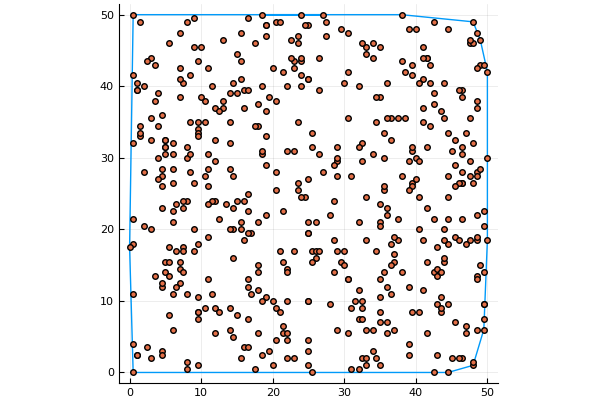

In [10]:
plot(R[2],aspect_ratio=:equal, leg=false)
scatter!(R[1])

##### Second, for positives and negatives values

In [14]:
C=ToFillp(500,50); #We generate the data 
R=J_CH_W(C); #Here we compute the convex hull


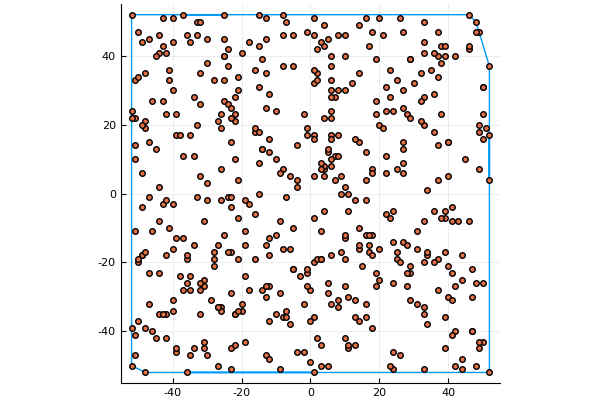

In [15]:
plot(R[2],aspect_ratio=:equal, leg=false)
scatter!(R[1])